<a href="https://colab.research.google.com/github/antreev-brar/ML-projects/blob/master/digitclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

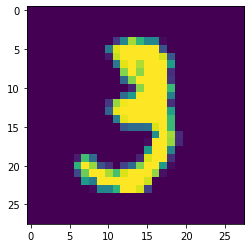

In [3]:

plt.imshow(x_train[10])
#x_train[0]

In [0]:
x_train = x_train/255.0
x_test =x_test/255.0

In [0]:
x_train[0]

In [0]:
model=keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128,activation='relu'),
     #tf.keras.layers.Dropout(0.2),
     keras.layers.Dense(10)
    ]
)

In [0]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']

)

In [10]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9987
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0048 - accuracy: 0.9985
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0038 - accuracy: 0.9987
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.002

In [11]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - loss: 0.1194 - accuracy: 0.9801


In [0]:
probability_model = keras.Sequential([model,
                                      tf.keras.layers.Softmax()
                                      
])

lets make some predictions


In [0]:
prediction = probability_model.predict(x_test)

In [14]:
prediction[0]

array([1.7050806e-13, 1.1445653e-23, 1.4563201e-13, 1.6584280e-09,
       5.5669843e-24, 2.8271376e-15, 1.6279829e-25, 1.0000000e+00,
       2.0883026e-14, 2.6207039e-13], dtype=float32)

In [15]:
np.argmax(prediction[1])

7

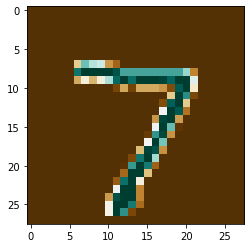

In [20]:
plt.imshow(x_test[0], cmap =plt.cm.BrBG)

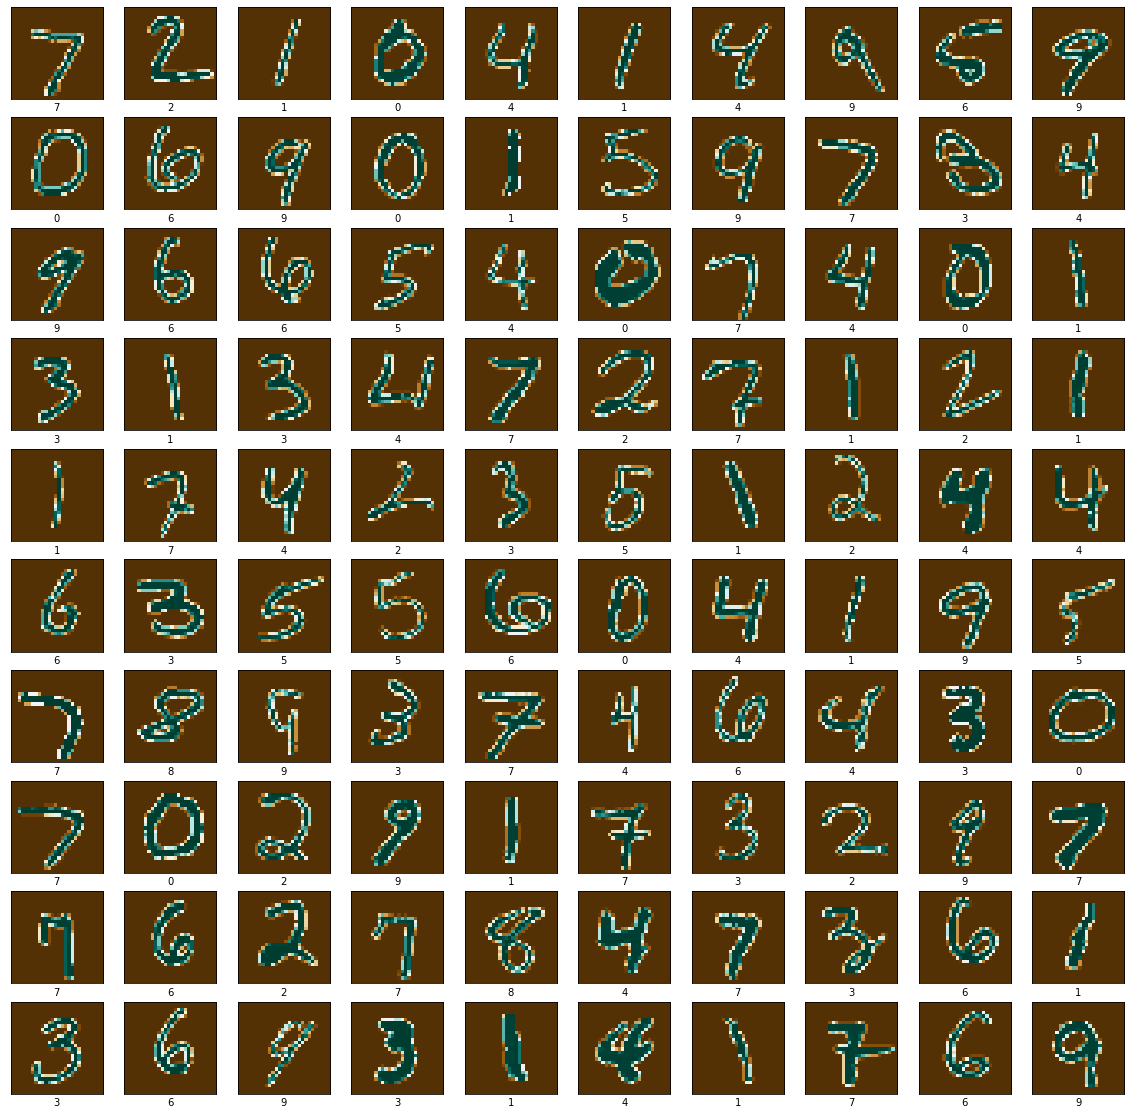

In [25]:
plt.figure(figsize=(20,20))
for i in range (100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i],cmap=plt.cm.BrBG)
  plt.xlabel(np.argmax(prediction[i]))